## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the cleaned data

In [2]:
consumption = pd.read_csv('../cleaned_data/consumption.csv',index_col='country')
generation_renewable = pd.read_csv('../cleaned_data/generation_renewable.csv',index_col='country')
generation_norenewable = pd.read_csv('../cleaned_data/generation_fossil.csv',index_col='country')
installations_renewable = pd.read_csv('../cleaned_data/capacity_renewable.csv',index_col='country')
installations_norenewable = pd.read_csv('../cleaned_data/capacity_fossil.csv',index_col='country')
imports = pd.read_csv('../cleaned_data/imports.csv',index_col='country')
exports = pd.read_csv('../cleaned_data/exports.csv',index_col='country')
population = pd.read_csv('../cleaned_data/population.csv',index_col='country')


# What countries are the TOP 10 cleanest and the TOP10  contaminants in 2017?
*As function of most generations and installation of renewables sources's energies.*

In [3]:
max_gen_renewables = generation_renewable.T.iloc[['37']] #choose the 2017 year
max_gen_norenewables = generation_norenewable.T.iloc[['37']]

print(f'''

TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
{max_gen_renewables.T.sort_values('2017',ascending= False).head(10)}

TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
{max_gen_norenewables.T.sort_values('2017',ascending= False).head(10)}

''')




TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
                    2017
country                 
China          1224.9900
Brazil          419.4520
Canada          395.9990
India           170.4410
Norway          141.6170
Japan           123.4490
Sweden           78.4080
United States    77.2765
Vietnam          70.2460
Venezuela        64.1990

TOP 10 COUNTRIES WITH MORE GENERATION OF RENWEABLES
                      2017
country                   
China          4397.628000
United States  2536.108892
India          1155.784000
Japan           770.705000
South Korea     369.656000
Saudi Arabia    326.834000
Iran            267.889000
Mexico          243.988000
Taiwan          216.474000
South Africa    213.279000




# Check the HUGE DIFFERENCE in quantities of billions of Kwh... this is the most interesting hint to follow the problem

# Taking a look of data

## Plot some important countries as function of:

**Consumption**

**Generation Renewable**

**Generation Fossile**

**Capacity(installations) Renewable**

**Capacity(installations) Fossile**

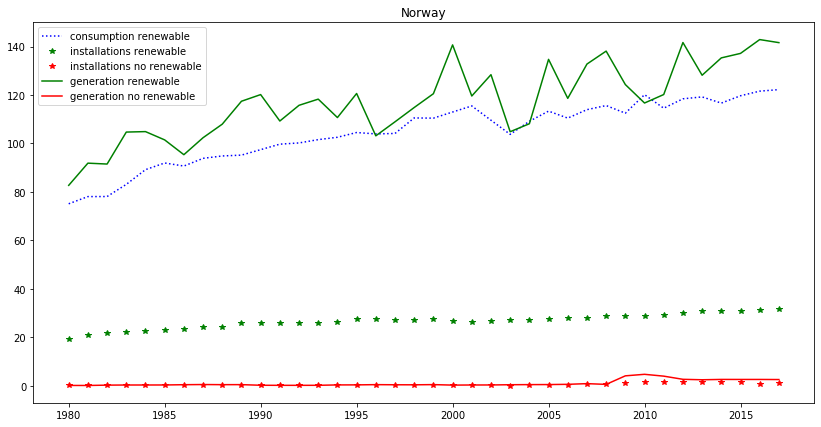

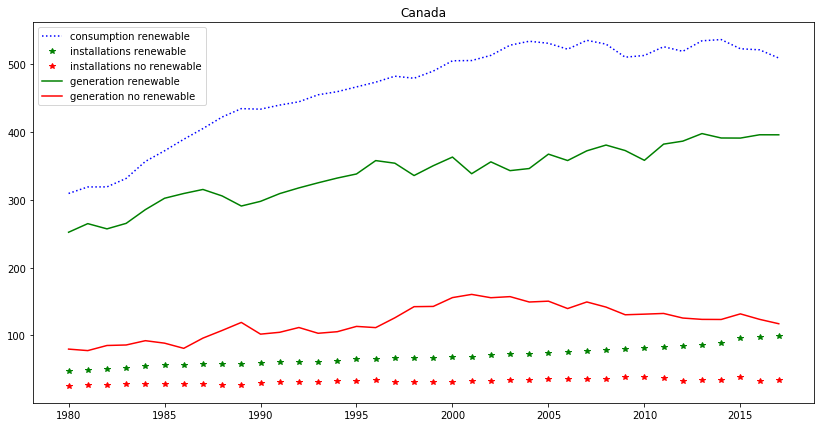

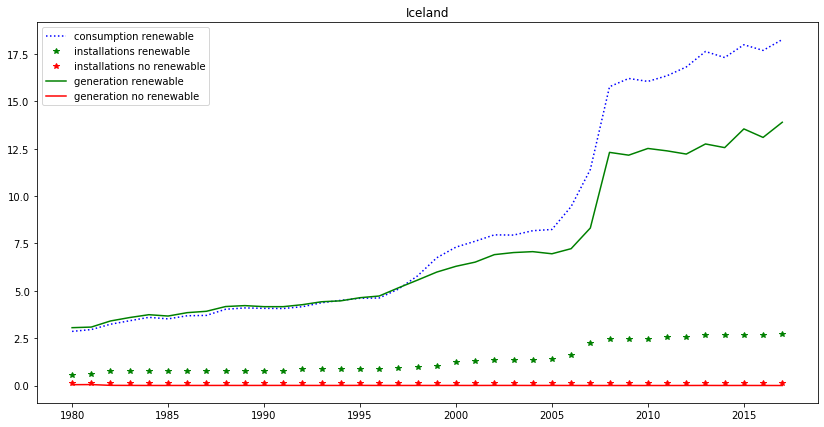

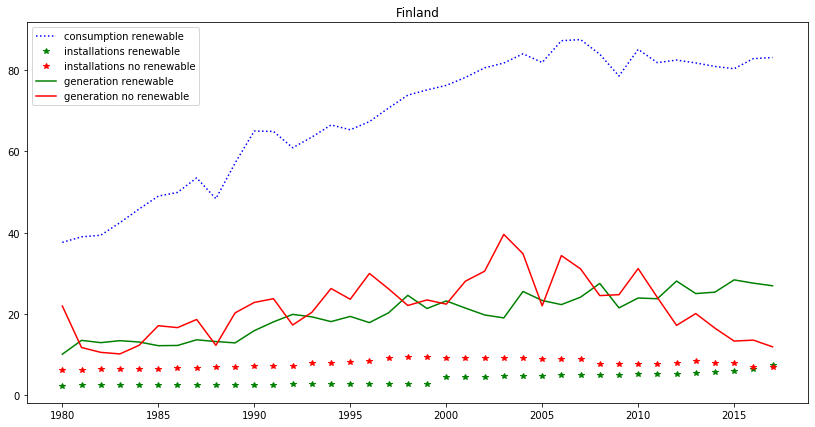

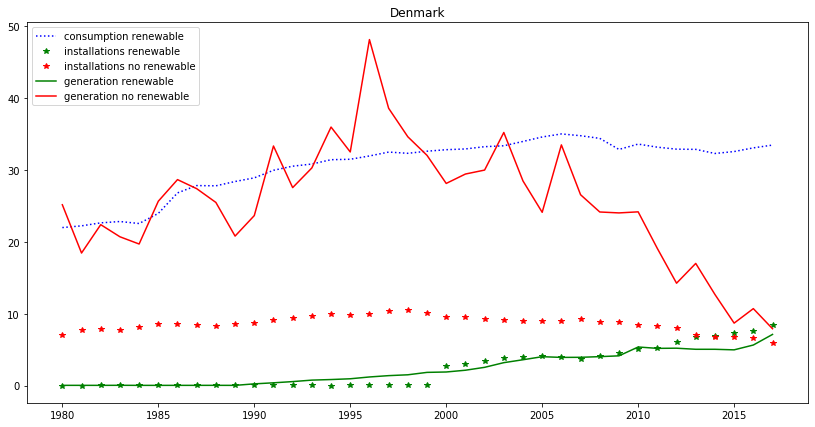

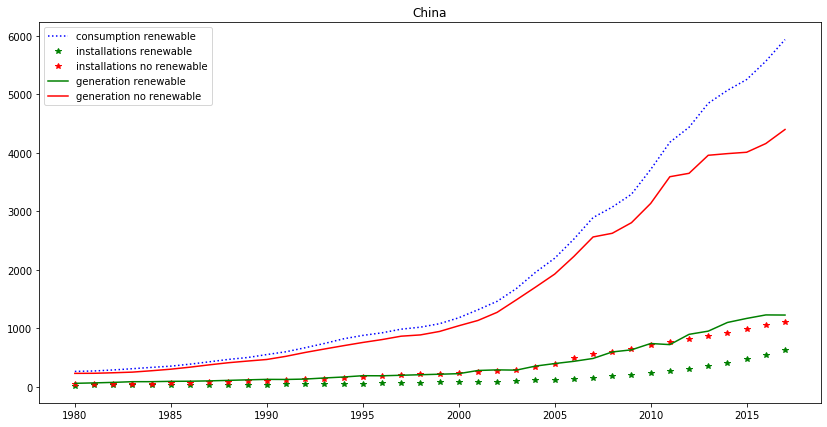

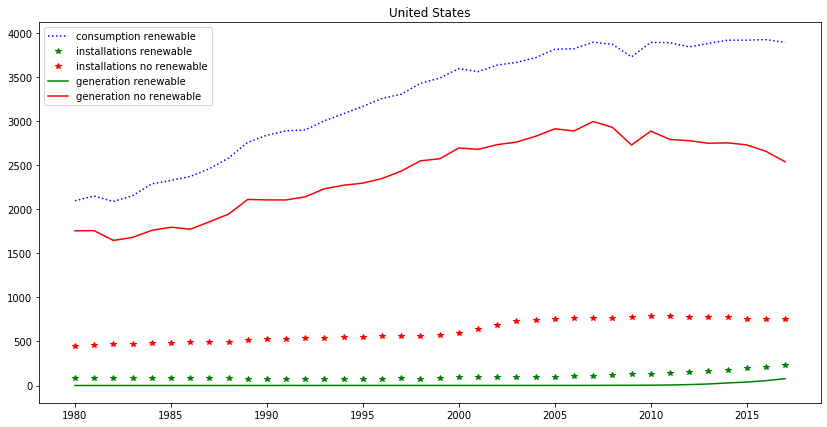

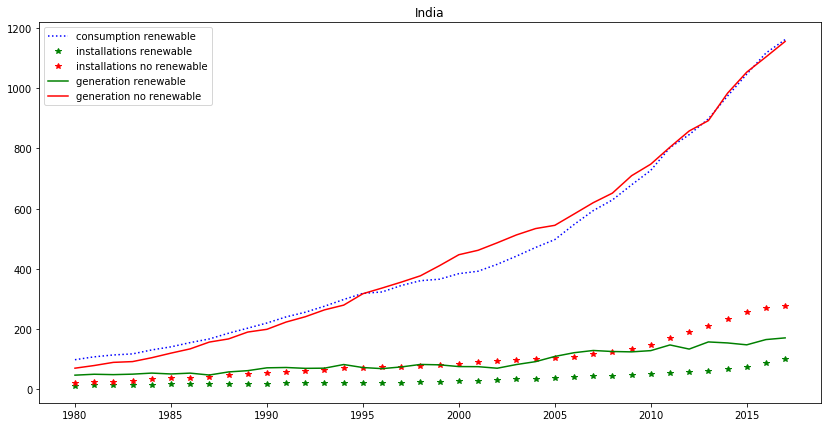

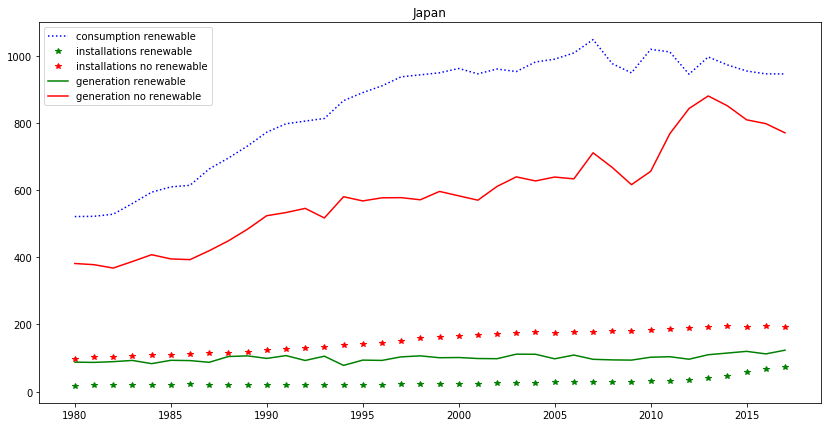

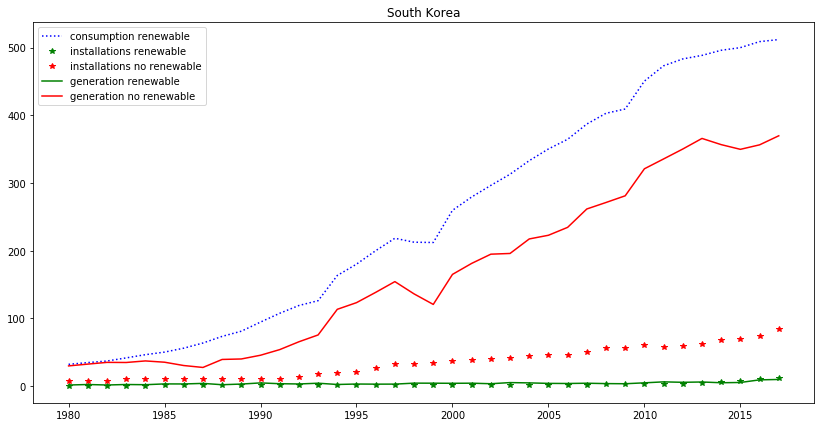

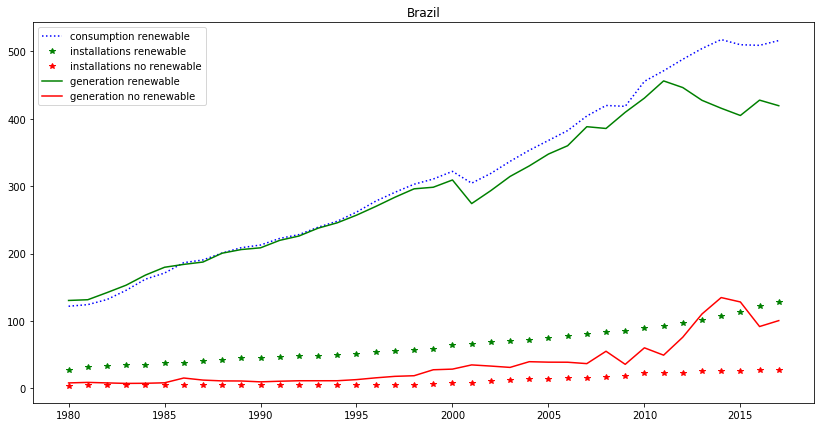

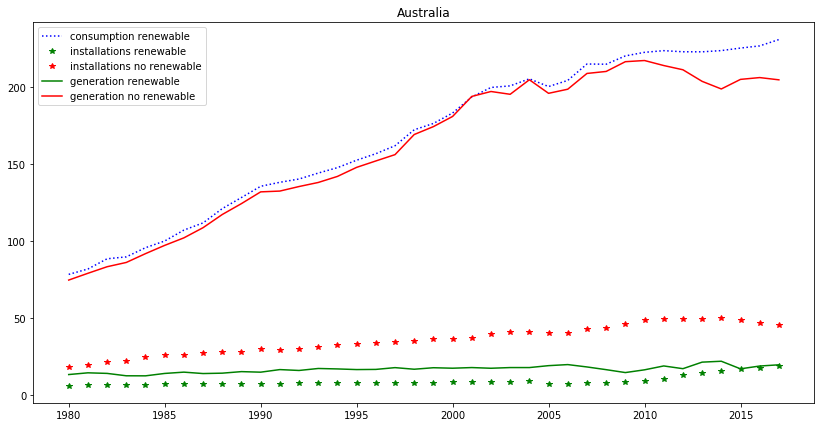

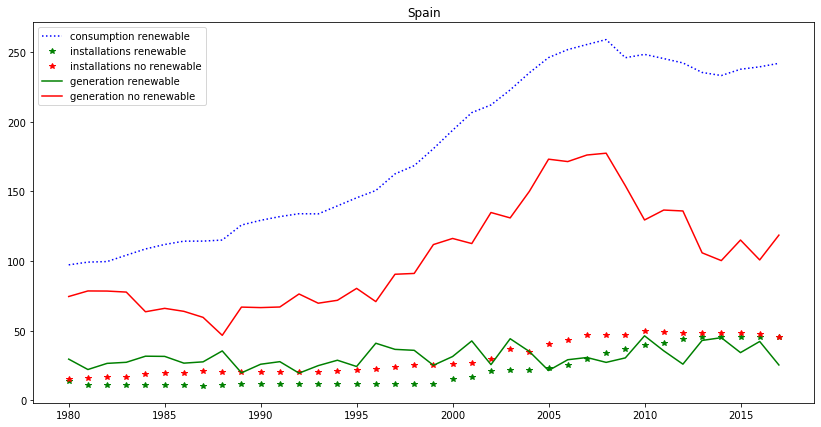

In [4]:
countries= list(['Norway','Canada','Iceland','Finland','Denmark','China','United States','India','Japan','South Korea','Brazil','Australia','Spain'])

t = np.arange(1980,2018,1)

for item in countries:
    fig,ax = plt.subplots(1, figsize=(14,7))
    plt.plot(t,consumption[item:item].T, 'b:', label= 'consumption renewable')
    plt.plot(t,installations_renewable[item:item].T, 'g*', label='installations renewable')
    plt.plot(t,installations_norenewable[item:item].T, 'r*', label='installations no renewable')
    plt.plot(t,generation_renewable[item:item].T, 'g', label='generation renewable')
    plt.plot(t,generation_norenewable[item:item].T, 'r', label='generation no renewable')

    plt.legend = ax.legend(loc='upper left')
    plt.title(item)
    plt.show()


## Analysis Generation renowable ratio for all countries: 

### Create a 'CLEAN RATIO' that measures the countries which spent more renewable energy from the total consumption

In [5]:
GNRE2017 = generation_norenewable[['2017']]
GRE2017 = generation_renewable[['2017']]
consumption2017 = consumption[['2017']]
population2017 = population[['2017']] 
INRE2017 = installations_norenewable[['2017']]
IRE2017 = installations_renewable[['2017']]


#MERGE THE THREE TABLES IN ONE.
difference0 = consumption2017.merge(population2017, how = 'outer',on = 'country',suffixes=('_cons','_RE'))
difference0 = difference0.merge(GRE2017, how = 'outer',on = 'country',suffixes=('_1','_2'))
difference0 = difference0.merge(GNRE2017, how = 'outer',on = 'country',suffixes=('_3','_4'))
difference0 = difference0.merge(IRE2017, how = 'outer',on = 'country',suffixes=('_5','_6'))
ratio = difference0.merge(INRE2017, how = 'outer',on = 'country',suffixes=('_7','_8'))
ratio.rename(columns={'2017_cons':'consumption_2017','2017_RE':'population_2017','2017_3':'gen_renewable_2017','2017_4':'gen_no_renewable_2017','2017_7':'inst_renewable_2017','2017_8':'inst_no_renewable_2017'},inplace=True)

#CREATE FOLLOWING COLUMNS: RATIO CLEAN COUNTRY GENERATION, RATIO CLEAN COUNTRY INSTALLATION, RATIO CONSUMPTION BY POPULATION

ratio['ratio_clean_generation'] = 100*ratio['gen_renewable_2017']/ratio['consumption_2017']
ratio['ratio_clean_installation'] = 100*ratio['inst_renewable_2017']/ratio['consumption_2017']
ratio['ratio_consumption_pop'] = 1000 *ratio['consumption_2017']/ratio['population_2017']
ratio
#DROP THE INITIAL COLUMNS, BECAUSE ARE USELESS TO PROVIDE INFORMATION
ratio.drop('consumption_2017',axis=1,inplace=True)
ratio.drop('gen_renewable_2017',axis=1,inplace=True)
ratio.drop('gen_no_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_renewable_2017',axis=1,inplace=True)
ratio.drop('inst_no_renewable_2017',axis=1,inplace=True)

ratio.dropna(inplace=True)

In [6]:
ratio.to_csv('../explored_data/ratios.csv')

In [8]:
ratio

population_2017  ratio_clean_generation  \
country                                                
Afghanistan        35463.900               18.174831   
Albania             2930.825               89.030207   
Algeria            41377.230                0.091255   
Angola             29877.140               82.120604   
Argentina          43987.190               33.276735   
...                      ...                     ...   
Venezuela          31977.070               92.380637   
Vietnam            95487.000               43.893051   
Yemen              28247.850                0.000000   
Zambia             17132.060               98.182406   
Zimbabwe           16538.660               52.381564   

             ratio_clean_installation  ratio_consumption_pop  
country                                                       
Afghanistan                  6.099820               0.162904  
Albania                     40.162957               1.716923  
Algeria                      1.178013               1.456622  
Angola                      26.222410               0.316931  
Argentina                    9.008778               2.838463  
...                               ...                    ...  
Venezuela                   22.239330               2.173245  
Vietnam                     10.680522               1.676029  
Yemen                        3.003003               0.117885  
Zambia                      19.743113               0.722563  
Zimbabwe                    13.429195               0.470957  

[163 rows x 4 columns]